This is a notebook to recreate Figure 1 of Lamb & Taylor 2023.  This notebook computes the Hellinger distances between analyses

In [5]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format ='retina'

import numpy as np
import matplotlib.pyplot as plt
import glob
from chainconsumer import ChainConsumer
import pickle
from ceffyl import Ceffyl, models
from enterprise.signals import parameter, gp_priors as gpp
from enterprise_extensions.model_utils import get_tspan
import la_forge.core as co
from scipy.stats import rv_histogram
import seaborn as sns

# ACCRE-specific import to load correct latex file
## COMMENT OUT AS REQUIRED
import os
os.environ["PATH"] += os.pathsep + '/home/lambwg/latex/bin/x86_64-linux' 

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [6]:
# setup default plotting code
plt.rcParams.update(plt.rcParamsDefault)
with open('/home/lambwg/ng15_rcparams.json', 'rb') as fin:
    plt.rcParams.update(json.load(fin))

NameError: name 'plt' is not defined

In [ ]:
plt.rcParams["figure.figsize"] = [3.5503666805036667*2, 2.1942472810764047]

# Compute Hellinger distance

Here is an example of computing Hellinger distances between posteriors of 100 realisations using a certain refit technique. This was computed in its own script for speed. Change `refitdir` to change refit technique

In [ ]:
hellinger = np.zeros(100)
for ii in range(0, 100):
    print(f'psr {ii}')
    
    # load spectral refit dir
    refitdir = f'/data/taylor_group/william_lamb/GFL/middleton21/freespec10f/realisation_{ii}/fftkde_10k_2/refits/10fplCP/'
    fs10f = co.Core(corepath=refitdir+'chain.core')
    
    # load full likelihood analysis
    chaindir = f'/data/taylor_group/william_lamb/GFL/middleton21/m2a_10f/realisation_{ii}/'
    m2a10f = co.Core(corepath=chaindir+'chain.core')
    
    # compute hellinger
    hellinger[ii] = metrics.hellinger(fs10f(['log10_A_gw', 'gamma_gw']),
                                      m2a10f(['log10_A_gw', 'gamma_gw']),
                                      Nbins=50)

Here I load values that I computed earlier for the 2D posterior

In [7]:
hGL = np.load('/home/lambwg/GFL/notebooks/middleton/metadata/GLhellinger.npy')  # GFL Lite
hfs = np.load('/home/lambwg/GFL/notebooks/middleton/metadata/fs/fshellinger.npy')  # fs refit
hGFL = np.load('/home/lambwg/GFL/notebooks/middleton/metadata/gfl/gflhellinger.npy')  # GFL

In [10]:
for h in [hfs, hGL, hGFL]:
    print(np.percentile(h, [16, 50, 84]))

[0.17017377 0.26453322 0.39620911]
[0.24273421 0.37959185 0.53924718]
[0.32271586 0.46939701 0.63197374]


...and for the 1D marginalised posteriors

In [3]:
#free spec
hg_fs = np.load('/home/lambwg/GFL/notebooks/middleton/metadata/fs/h1Dg.npy')
hA_fs = np.load('/home/lambwg/GFL/notebooks/middleton/metadata/fs/h1DA.npy')

# GFL Lite
hg_GL = np.load('/home/lambwg/GFL/notebooks/middleton/metadata/h1Dg_GL.npy')
hA_GL = np.load('/home/lambwg/GFL/notebooks/middleton/metadata/h1DA_GL.npy')

# GFL
hg_GFL = np.load('/home/lambwg/GFL/notebooks/middleton/metadata/gfl/h1Dg.npy')
hA_GFL = np.load('/home/lambwg/GFL/notebooks/middleton/metadata/gfl/h1DA.npy')

# Plot!

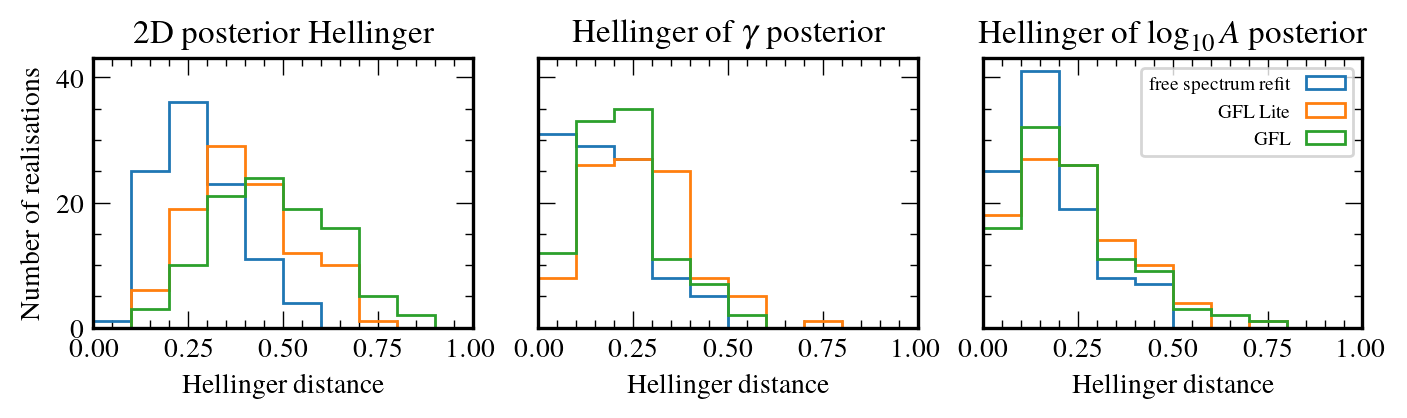

/tmp/ipykernel_176265/656822049.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../plots/hellinger.pdf',


In [11]:
bins = np.linspace(0, 1, 11)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, tight_layout=True,
                                    sharey=True, sharex=True)

ax1.hist(hfs, histtype='step', bins=bins, label='free spectrum refit')
ax1.hist(hGL, histtype='step', bins=bins, label='GFL Lite')
ax1.hist(hGFL, histtype='step', bins=bins, label='GFL')
ax1.set_xlabel('Hellinger distance')
ax1.set_ylabel('Number of realisations')
ax1.set_title(r'2D posterior Hellinger')

ax2.hist(hg_fs, histtype='step', bins=bins, label='free spectrum refit')
ax2.hist(hg_GL, histtype='step', bins=bins, label='GFL Lite')
ax2.hist(hg_GFL, histtype='step', bins=bins, label='GFL')
ax2.set_xlabel('Hellinger distance')
ax2.set_title(r'Hellinger of $\gamma$ posterior')

ax3.hist(hA_fs, histtype='step', bins=bins, label='free spectrum refit')
ax3.hist(hA_GL, histtype='step', bins=bins, label='GFL Lite')
ax3.hist(hA_GFL, histtype='step', bins=bins, label='GFL')
ax3.set_title(r'Hellinger of $\log_{10}A$ posterior')
ax3.set_xlabel('Hellinger distance')
ax3.legend(markerfirst=False)

ax1.set_xlim(0,1)

plt.show();
fig.savefig('../plots/hellinger.pdf',
            dpi=400, bbox_inches='tight',
            rasterize=True);